In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datasets import load_dataset

/data/katie_kang/miniconda3/envs/trlx2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = load_dataset("hendrycks/competition_math")

/data/katie_kang/miniconda3/envs/trlx2/lib/python3.9/site-packages/datasets/load.py:1461: FutureWarning: The repository for hendrycks/competition_math contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/hendrycks/competition_math
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [3]:
train_levels = dataset["train"]["level"]
test_levels = dataset["test"]["level"]

train_levels_int = []
for level in train_levels:
    if level[-1] == "?":
        train_levels_int.append(-1)
    else:
        train_levels_int.append(int(level[-1]))
train_levels_int = np.array(train_levels_int)
        
test_levels_int = []
for level in test_levels:
    if level[-1] == "?":
        test_levels_int.append(-1)
    else:
        test_levels_int.append(int(level[-1]))
test_levels_int = np.array(test_levels_int)

In [4]:
train_levels = np.array(train_levels)
test_levels = np.array(test_levels)

In [9]:


# checkpoints  = [50, 100, 150, 200, 250, 300]
checkpoints  = [100, 200, 300, 400, 500, 600, 700]


test_accs= []
for ckpt in checkpoints:
    test_answer_types = np.load(f"../ckpts/math_fft_full_save_5epochs/checkpoint-{str(ckpt)}/test_answer_types5.npy")
    test_accs.append((test_answer_types==0).max(axis=-1))
test_accs = np.array(test_accs)

In [6]:
test_accs.mean(axis=-1)

array([0.0328 , 0.03796, 0.04092, 0.0492 , 0.05724, 0.06248, 0.06472])

In [10]:


# checkpoints  = [50, 100, 150, 200, 250, 300]
checkpoints  = [100, 200, 300, 400, 500, 600, 700]

train_accs= []
for ckpt in checkpoints:
    test_answer_types = np.load(f"../ckpts/math_fft_full_save_5epochs/checkpoint-{str(ckpt)}/train1000_answer_types5.npy")
    train_accs.append((test_answer_types==0).max(axis=-1))
train_accs = np.array(train_accs)

In [8]:
train_accs.shape

(7, 1000)

(0.0, 1.0)

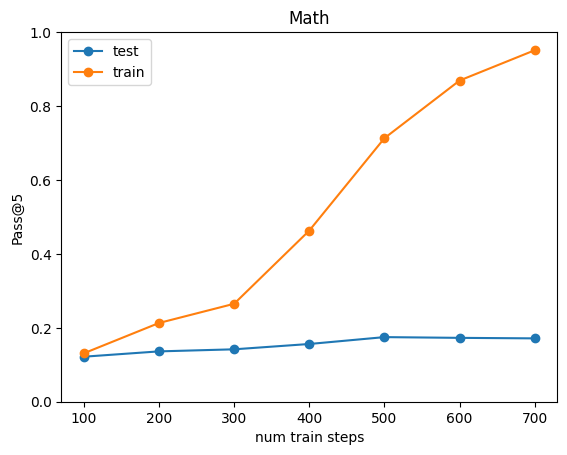

In [12]:
plt.plot(checkpoints, test_accs.mean(axis=-1), "o-", label="test")
plt.plot(checkpoints, train_accs.mean(axis=-1),"o-", label="train")
plt.xlabel("num train steps")
plt.ylabel("Pass@5")
plt.legend()
plt.title("Math")
plt.ylim(0, 1)

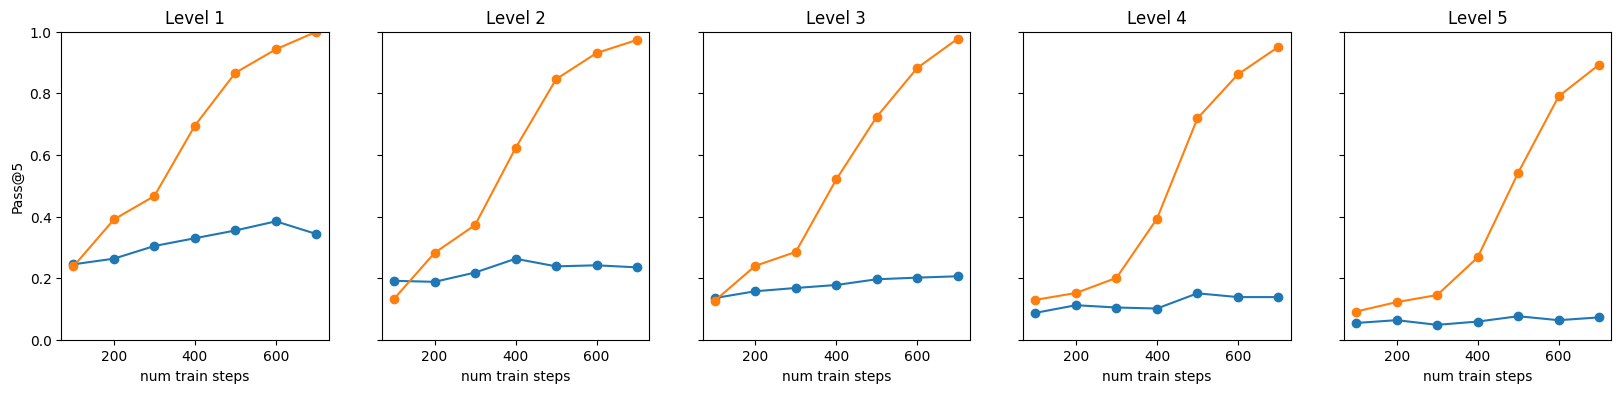

In [14]:
fig, axs = plt.subplots(1, 5, sharey=True, figsize=(20, 4))
for level in [1, 2, 3, 4, 5]:
    fig_idx = level-1
    train_level1_idxs = np.where(train_levels_int[:1000]==level)[0]
    test_level1_idxs = np.where(test_levels_int==level)[0]

    axs[fig_idx].plot(checkpoints, test_accs[:, test_level1_idxs].mean(axis=-1), "o-", label="test", color = "C0")
    axs[fig_idx].plot(checkpoints, train_accs[:, train_level1_idxs].mean(axis=-1),"o-", label="train", color = "C1")
    axs[fig_idx].set_title(f"Level {level}")
    axs[fig_idx].set_xlabel("num train steps")
    axs[fig_idx].set_ylim(0, 1)
    
    if fig_idx == 0:
        axs[fig_idx].set_ylabel("Pass@5")